# ℹ️ Introduction to data science notebooks

You can skip this section if you are already familiar with data science notebooks.

## Data science notebooks
A _data science notebook_ is a document that contains text cells (what you're reading right now) and code cells. What is unique with a notebook is that it's **interactive**: You can change or add code cells, and then **run** a cell by selecting it and then clicking the **Run** button above ( <strong>▶</strong>, or Run All ) or hitting `shift + enter`.

The result will be displayed directly in the notebook. 

Try running the cell below:

In [ ]:
# Run this cell to see the result
100 * 1.75 * 16

2800.0

Modify any of the numbers and rerun the cell.

## Data science notebooks & data analysis
Notebooks are great for interactive data analysis. Let's create a pandas DataFrame using the `read_csv()` function. 

We will load the dataset "sales_data.csv" containing three months of sales data for the company. We use the `parse_dates` option to ensure that the "date" column is loaded correctly.

By using the `head()` command, we display the first five rows of data:

In [2]:
# Importing the pandas module
import pandas as pd

# Reading in the sales data
df = pd.read_csv('sales_data.csv', parse_dates=['date'])

# Take a look at the first datapoints
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


## Data analysis example:

Find the total sales for each warehouse. 

We can use `groupby` to group the information by the column "warehouse". Then we select the column "total" and use `.sum()` to add the "total" column for each warehouse:

In [3]:
df.groupby('warehouse')[['total']].sum()

,total
warehouse,
Central,141982.88
North,100203.63
West,46926.49


## Data science notebooks & visualizations
Visualizations are very helpful to summarize data and gain insights. A well-crafted chart often conveys information much better than a table.

It is very straightforward to include plots in a data science notebook. For example, let's look at the average number of items purchased by each client type. 

We are using the `matplotlib.pyplot` library for this example. We will run the `.plot()` method on the data we want to display and call `plt.show()` to draw the plot:

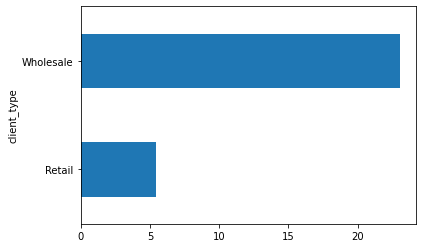

In [4]:
import matplotlib.pyplot as plt

avg_units_client_type = df.groupby('client_type')['quantity'].mean()
avg_units_client_type.plot(kind='barh')
plt.show()

# Reporting on sales data

Now let's now move on to the competition and challenge.

## 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

In [5]:
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the introduction to data science notebooks, so the workbook is focused on your story.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [105]:
df.duplicated().any()

False

In [106]:
df.isna().any()

date            False
warehouse       False
client_type     False
product_line    False
quantity        False
unit_price      False
total           False
payment         False
dtype: bool

# 1. What are the total sales for each payment method?


In [6]:
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


### First, want to know how is the total sale by the time

<AxesSubplot:xlabel='date'>

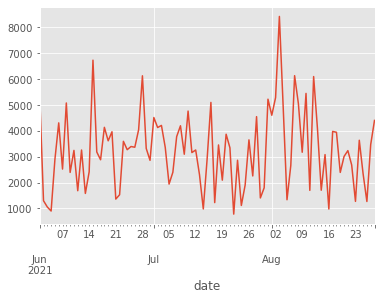

In [61]:
df.groupby('date').total.sum().plot()

<AxesSubplot:xlabel='date'>

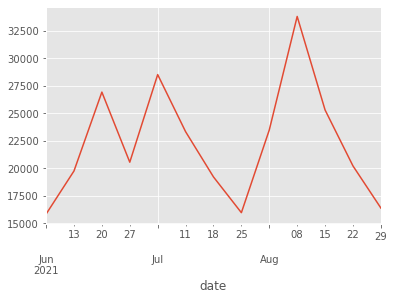

In [87]:
df.groupby(pd.Grouper(key = 'date', freq = '1w')).total.sum().plot()

### The total sale per week looks quite unstable

<AxesSubplot:xlabel='date'>

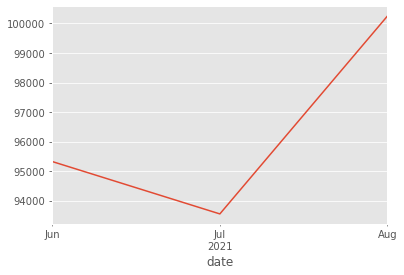

In [88]:
df.groupby(pd.Grouper(key = 'date', freq = '1m')).total.sum().plot()

### The total sale per month
### In July the total sale is lowest and August rapidly increased

In [7]:
df.groupby('payment').total.sum()

payment
Cash            19199.10
Credit card    110271.57
Transfer       159642.33
Name: total, dtype: float64

In [43]:
credit = df[df.payment == 'Credit card'].groupby('date').total.sum()

In [44]:
credit

date
2021-06-01    1524.57
2021-06-02    1297.14
2021-06-03    1025.54
2021-06-04     899.40
2021-06-05    1357.72
               ...   
2021-08-24     287.48
2021-08-25     668.63
2021-08-26     507.09
2021-08-27    1313.69
2021-08-28     930.73
Name: total, Length: 89, dtype: float64

In [41]:
cash = df[df.payment == 'Cash'].groupby('date').total.sum()

In [42]:
transfer = df[df.payment == 'Transfer'].groupby('date').total.sum()

In [9]:
import seaborn as sns

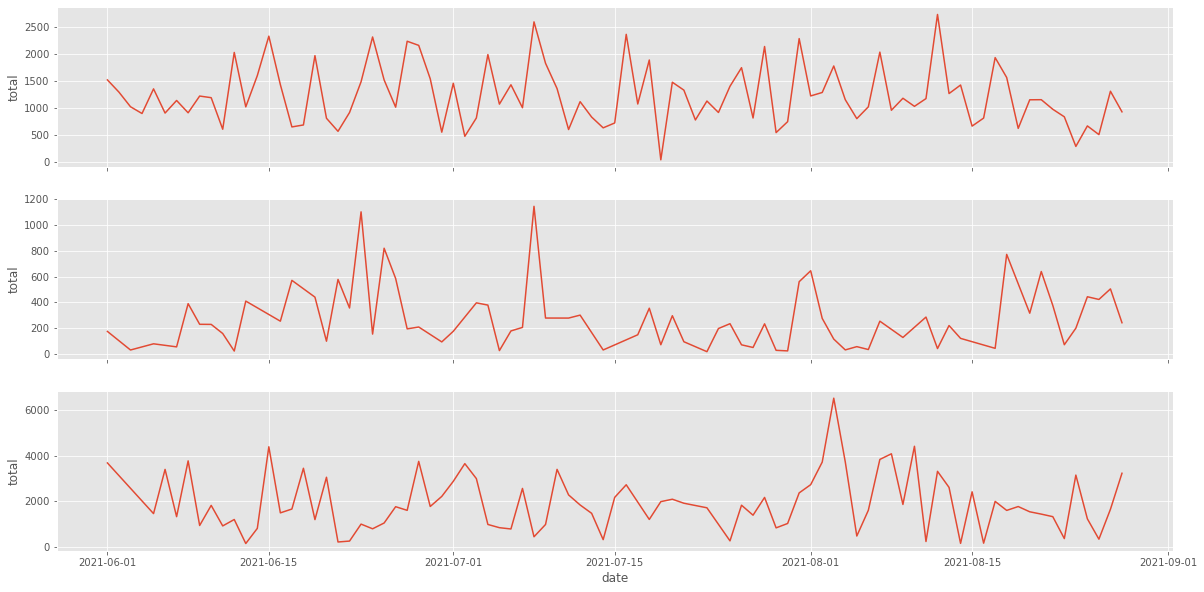

In [49]:
fig, axes = plt.subplots(3, sharex = True, figsize = (20,10))
sns.lineplot(data = credit, ax = axes[0])
sns.lineplot(data = cash, ax = axes[1])
sns.lineplot(data = transfer, ax = axes[2])
plt.show()

<AxesSubplot:xlabel='date'>

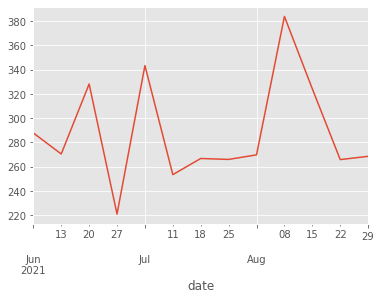

In [63]:
df.groupby(pd.Grouper(key = 'date', freq = '1w') ).total.mean().plot()

In [79]:
payment_per_week = df.groupby(['payment', pd.Grouper(key = 'date', freq = '1w')]).total.sum().reset_index()

In [80]:
payment_per_week

,payment,date,total
0,Cash,2021-06-06,280.30
1,Cash,2021-06-13,1488.89
2,Cash,2021-06-20,1362.10
3,Cash,2021-06-27,3789.13
4,Cash,2021-07-04,1249.23
5,Cash,2021-07-11,2108.45
6,Cash,2021-07-18,831.67
7,Cash,2021-07-25,905.75
8,Cash,2021-08-01,1605.67
9,Cash,2021-08-08,760.55


<AxesSubplot:xlabel='date', ylabel='total'>

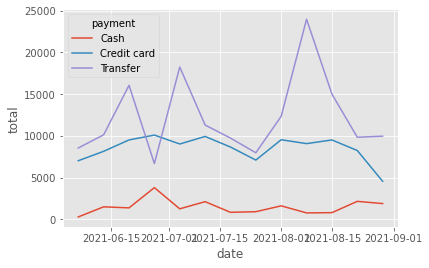

In [82]:
sns.lineplot(x ='date', y = 'total', data = payment_per_week, hue = 'payment')

### The payment method 'Transfer' has most biggest total paying amount. But it is quite unstable, while 'Credit card' and 'Cash' are relative constant.

In [90]:
df.groupby(['payment', pd.Grouper(key = 'date', freq = '1w')]).total.mean()

payment      date      
Cash         2021-06-06      93.433333
             2021-06-13     165.432222
             2021-06-20     272.420000
             2021-06-27     222.890000
             2021-07-04     124.923000
             2021-07-11     162.188462
             2021-07-18     138.611667
             2021-07-25     113.218750
             2021-08-01     145.970000
             2021-08-08     126.758333
             2021-08-15     131.935000
             2021-08-22     214.551000
             2021-08-29     156.686667
Credit card  2021-06-06     159.367045
             2021-06-13     173.144894
             2021-06-20     175.950741
             2021-06-27     160.061746
             2021-07-04     180.277400
             2021-07-11     165.293500
             2021-07-18     173.044000
             2021-07-25     181.768462
             2021-08-01     161.434576
             2021-08-08     156.196552
             2021-08-15     175.917963
             2021-08-22     158.356538
 

<AxesSubplot:xlabel='date', ylabel='total'>

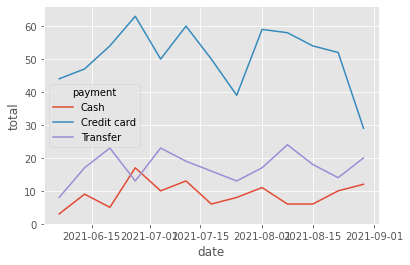

In [104]:
ax = df.groupby(['payment', pd.Grouper(key = 'date', freq = '1w')]).count()
sns.lineplot(x = 'date', y = 'total', data = ax, hue = 'payment')


### interestingly the number of Purchase through 'Transfer' is relative stable compare to total paying amount of 'Transfer'

### Rather, the number of credit card purchases is more unstable. And after middle of August is rapidly decreased 

### I should have a look more the data, but I guess that most payment methods of Transfer would be from wholesale.

## In conclusion about total sale, the 'Transfer' payment method is most huge part, but It is unstable. but the number of 'transfer' is ok. It means that there are customers who regulary buy through Transfer but they purchase products sometimes a lot and sometimes not

# 2. What is the average unit price for each product line?

In [109]:
from matplotlib import cm

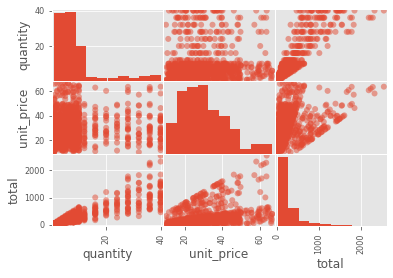

In [112]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(df, marker = 'o', cmap = cmap)

In [113]:
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [116]:
df.product_line.unique()

array(['Miscellaneous', 'Breaking system', 'Suspension & traction',
       'Frame & body', 'Engine', 'Electrical system'], dtype=object)

In [119]:
df.groupby('product_line')['unit_price'].mean()

product_line
Breaking system          17.740522
Electrical system        25.585130
Engine                   60.091803
Frame & body             42.832229
Miscellaneous            22.810738
Suspension & traction    33.969868
Name: unit_price, dtype: float64

<AxesSubplot:xlabel='product_line', ylabel='unit_price'>

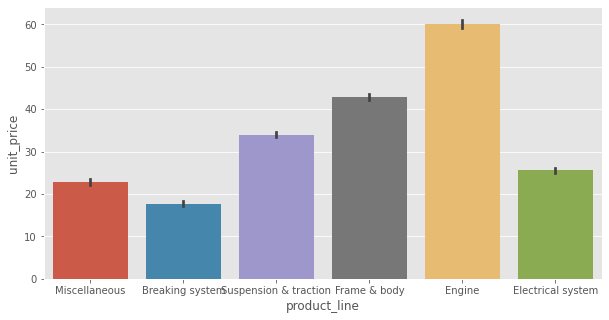

In [146]:
plt.figure(figsize = (10,5))
sns.barplot(x= 'product_line', y = 'unit_price', data = df)

### As we can expect, engine is the most expansive item, after than 'Frame & doby'

In [131]:
df.groupby('product_line')['unit_price'].count().sort_values(ascending = False)

product_line
Breaking system          230
Suspension & traction    228
Electrical system        193
Frame & body             166
Miscellaneous            122
Engine                    61
Name: unit_price, dtype: int64

### quantitatively the company sold Breaking system and Suspension & Traction most.

In [133]:
df.groupby('product_line').unit_price.describe()

,count,mean,std,min,25%,50%,75%,max
product_line,,,,,,,,
Breaking system,230.0,17.740522,4.396909,10.03,14.0300,17.380,21.6275,24.98
Electrical system,193.0,25.585130,4.312426,18.35,21.7000,25.530,29.1800,33.33
Engine,61.0,60.091803,4.135811,51.79,56.7200,59.820,63.5800,66.62
Frame & body,166.0,42.832229,4.484133,35.03,39.0675,43.105,46.7800,49.99
Miscellaneous,122.0,22.810738,4.442666,15.02,19.0275,22.480,26.6075,29.96
Suspension & traction,228.0,33.969868,4.523732,26.76,29.7275,33.730,37.9175,41.65


<AxesSubplot:>

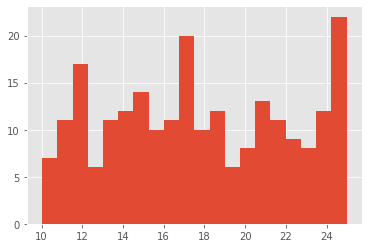

In [157]:
df[df['product_line'] == 'Breaking system']['unit_price'].hist(bins = 20)

<AxesSubplot:xlabel='unit_price', ylabel='Count'>

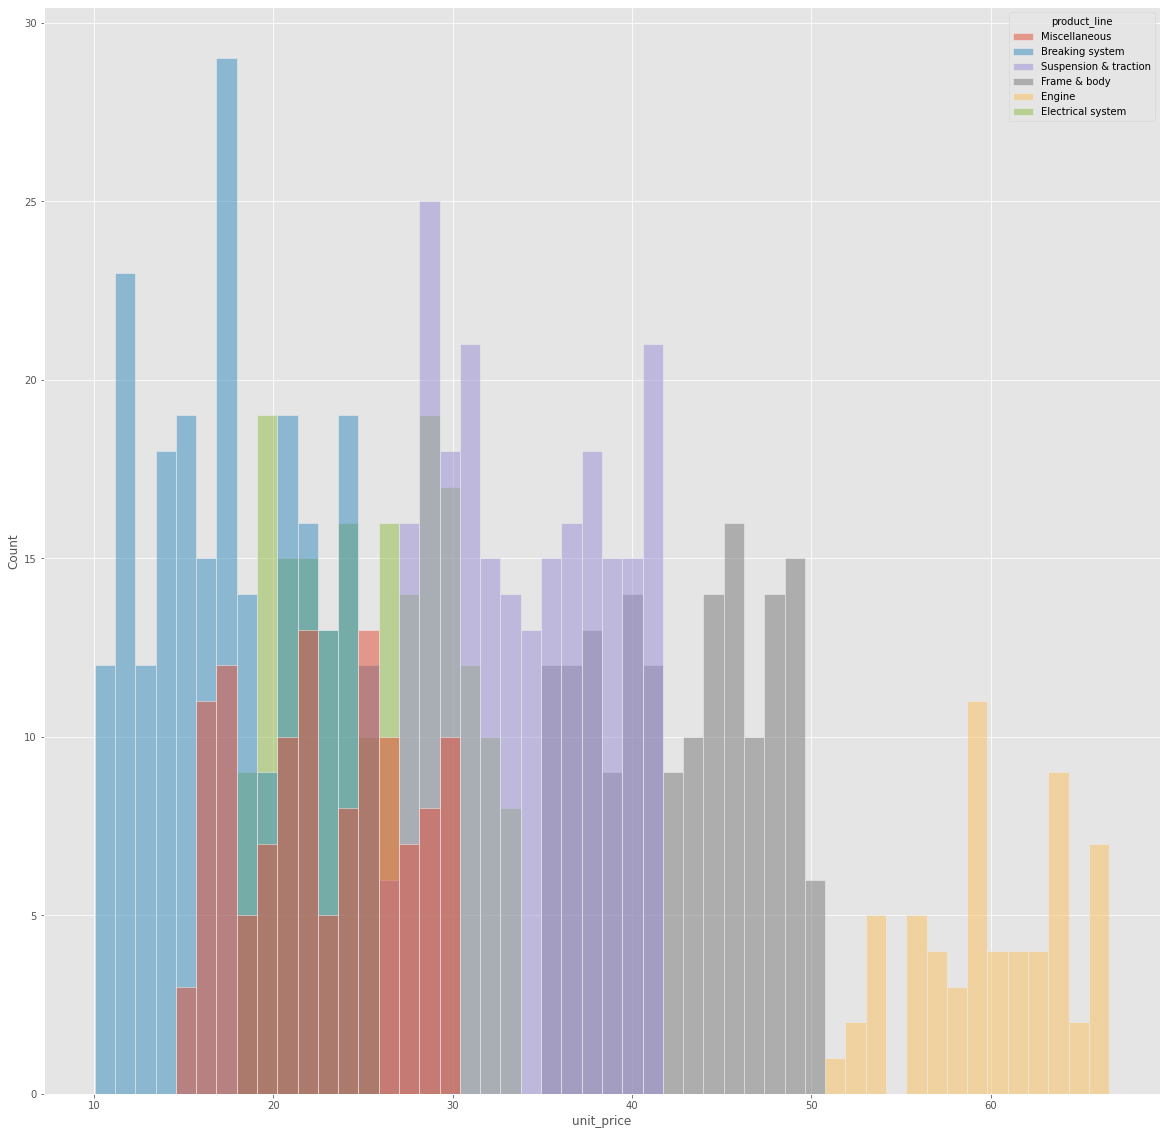

In [172]:
plt.figure(figsize = (20,20))
sns.histplot(x = 'unit_price', data = df, hue = 'product_line', bins = 50)

### 3. Visualization. I did already with question 1 and 2

###  4. Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)

In [173]:
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


### Analaysing by client type

In [174]:
df.client_type.unique()

array(['Retail', 'Wholesale'], dtype=object)

In [185]:
by_client = df.groupby('client_type')[['quantity', 'total']].sum().reset_index()
by_client

,client_type,quantity,total
0,Retail,4215,129470.67
1,Wholesale,5180,159642.33


<AxesSubplot:xlabel='client_type', ylabel='total'>

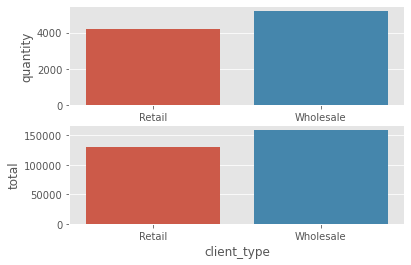

In [201]:
fig, axes = plt.subplots(2)
sns.barplot(x = 'client_type', y = 'quantity', data = by_client, ax = axes[0])
sns.barplot(x = 'client_type', y = 'total', data = by_client, ax = axes[1])

In [207]:
df.groupby(['client_type', 'payment']).sum()

quantity  unit_price      total
client_type payment                                     
Retail      Cash              627     3479.98   19199.10
            Credit card      3588    19992.33  110271.57
Wholesale   Transfer         5180     6849.73  159642.33

In [209]:
df.groupby(['client_type', 'payment']).mean()

quantity  unit_price       total
client_type payment                                       
Retail      Cash          5.405172   29.999828  165.509483
            Credit card   5.444613   30.337375  167.331669
Wholesale   Transfer     23.022222   30.443244  709.521467

### sale from Wholesale part is little bit more than retail part. And like I expected, payment method of Wholesale is only 'Transfer'. The payment methods from Retail are only Credit card and Cash

### Wholesale buy more than two times than Retail 

In [211]:
(df.quantity * df.unit_price == df.total).value_counts()

False    746
True     254
dtype: int64

### just came in my mind to check the difference between quantity * unit_price and total price and most of them are something wrong

In [214]:
df['quant_price'] = df.quantity * df.unit_price

In [215]:
df['diff'] = df.total - df.quant_price

In [221]:
df['diff'].describe()

count    1000.000000
mean        0.000840
std         0.040016
min        -0.200000
25%        -0.010000
50%         0.000000
75%         0.010000
max         0.200000
Name: diff, dtype: float64

In [229]:
df[df['diff']>0]['diff'].sum()

11.790000000001402

In [230]:
df[df['diff']<0]['diff'].sum()

-10.95000000000098

### Ok this difference we can ignore

In [238]:
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,quant_price,diff
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,134.80,3.000000e-02
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash,173.61,2.842171e-14
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,263.44,1.000000e-02
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,605.44,0.000000e+00
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card,120.96,0.000000e+00


In [232]:
df.warehouse.unique()

array(['Central', 'North', 'West'], dtype=object)

In [237]:
df.groupby('warehouse').date.count()

warehouse
Central    480
North      340
West       180
Name: date, dtype: int64

In [235]:
df.groupby('warehouse').total.sum()

warehouse
Central    141982.88
North      100203.63
West        46926.49
Name: total, dtype: float64

In [236]:
df.groupby('warehouse').total.sum() / df.groupby('warehouse').date.count()

warehouse
Central    295.797667
North      294.716559
West       260.702722
dtype: float64

In [246]:
local_cli = df.groupby(['warehouse','client_type'] ).total.sum().reset_index()
local_cli

,warehouse,client_type,total
0,Central,Retail,63126.12
1,Central,Wholesale,78856.76
2,North,Retail,42137.36
3,North,Wholesale,58066.27
4,West,Retail,24207.19
5,West,Wholesale,22719.30


<AxesSubplot:xlabel='warehouse', ylabel='total'>

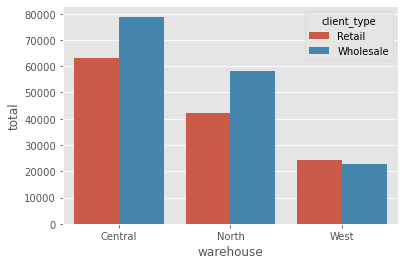

In [247]:
sns.barplot(x = 'warehouse', y = 'total', data = local_cli, hue = 'client_type')